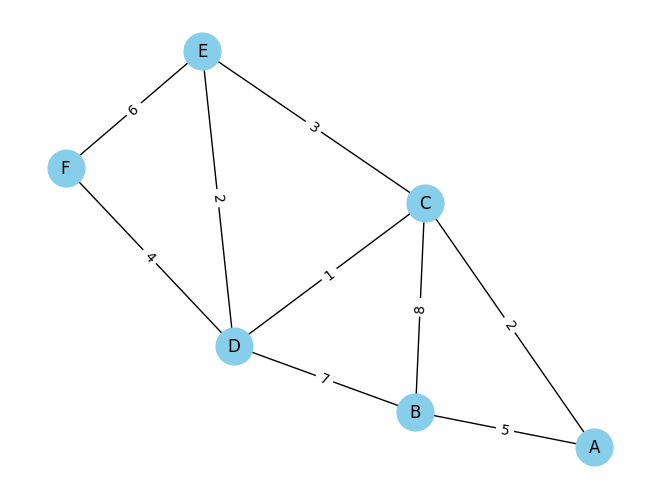

Dijkstra's Shortest Path: ['A', 'C', 'D', 'F']
Path Length: 7
A* Shortest Path: ['A', 'C', 'D', 'F']
Path Length: 7

Comparison of Algorithms:
Dijkstra's Path: ['A', 'C', 'D', 'F'] Length: 7
A* Path: ['A', 'C', 'D', 'F'] Length: 7


C:\Users\ranad\AppData\Local\Temp\ipykernel_18380\1556957551.py:35: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((x1 - x2) * 2 + (y1 - y2) * 2)


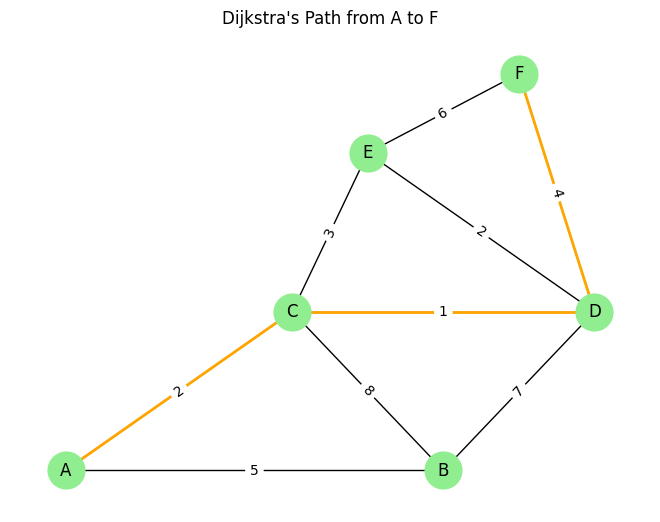

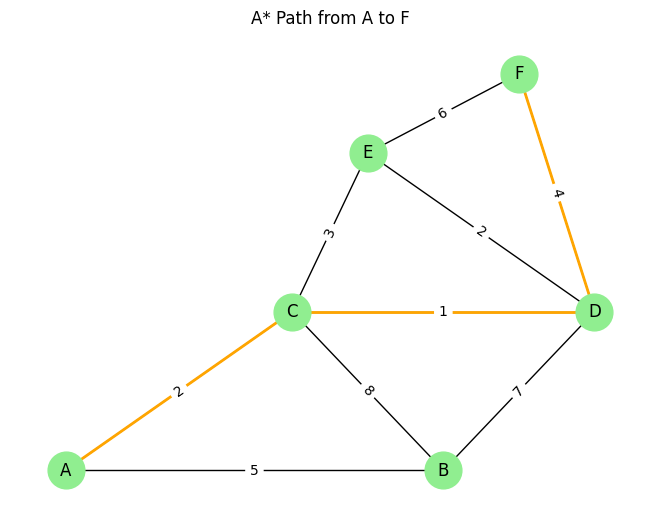

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Create a directed graph
city_graph = nx.Graph()
city_graph.add_weighted_edges_from([
    ("A", "B", 5), ("A", "C", 2), ("B", "C", 8), ("B", "D", 7),
    ("C", "D", 1), ("C", "E", 3), ("D", "E", 2), ("D", "F", 4),
    ("E", "F", 6)
])

# Visualize the graph
pos = nx.spring_layout(city_graph)
nx.draw(city_graph, pos, with_labels=True, node_color="skyblue", node_size=700)
edge_labels = nx.get_edge_attributes(city_graph, 'weight')
nx.draw_networkx_edge_labels(city_graph, pos, edge_labels=edge_labels)
plt.show()

# Dijkstra's Algorithm
def dijkstra_shortest_path(graph, start, end):
    path = nx.dijkstra_path(graph, start, end, weight='weight')
    length = nx.dijkstra_path_length(graph, start, end, weight='weight')
    return path, length

# Example: Find shortest path from 'A' to 'F'
path, length = dijkstra_shortest_path(city_graph, 'A', 'F')
print("Dijkstra's Shortest Path:", path)
print("Path Length:", length)

# Define heuristic (Euclidean distance)
def euclidean_heuristic(u, v, pos):
    (x1, y1) = pos[u]
    (x2, y2) = pos[v]
    return np.sqrt((x1 - x2) * 2 + (y1 - y2) * 2)

# Positioning nodes for heuristic calculation
pos = {
    "A": (0, 0), "B": (5, 0), "C": (3, 2),
    "D": (7, 2), "E": (4, 4), "F": (6, 5)
}

# A* Algorithm
def astar_path(graph, start, end, heuristic):
    path = nx.astar_path(graph, start, end, heuristic=lambda u, v: heuristic(u, v, pos), weight='weight')
    length = nx.astar_path_length(graph, start, end, heuristic=lambda u, v: heuristic(u, v, pos), weight='weight')
    return path, length

# Example: Find shortest path from 'A' to 'F' using A*
path, length = astar_path(city_graph, 'A', 'F', euclidean_heuristic)
print("A* Shortest Path:", path)
print("Path Length:", length)

# Compare Algorithms
dijkstra_path, dijkstra_length = dijkstra_shortest_path(city_graph, 'A', 'F')
astar_path, astar_length = astar_path(city_graph, 'A', 'F', euclidean_heuristic)
print("\nComparison of Algorithms:")
print("Dijkstra's Path:", dijkstra_path, "Length:", dijkstra_length)
print("A* Path:", astar_path, "Length:", astar_length)

# Visualize Path Function
def visualize_path(graph, path, pos, title="Path Visualization"):
    plt.figure()
    nx.draw(graph, pos, with_labels=True, node_color="lightgreen", node_size=700)
    nx.draw_networkx_edges(graph, pos, edgelist=[(path[i], path[i + 1]) for i in range(len(path) - 1)],
                           edge_color="orange", width=2)
    edge_labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
    plt.title(title)
    plt.show()

# Visualize Dijkstra's Path
visualize_path(city_graph, dijkstra_path, pos, title="Dijkstra's Path from A to F")

# Visualize A* Path
visualize_path(city_graph, astar_path, pos, title="A* Path from A to F")